In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df_ob = pd.read_csv('order_book_snapshot.csv')
df_trades = pd.read_csv('trades.csv')
df_ob_sorted = df_ob.sort_values(by='timestamp').copy()

if not df_ob.empty:
    df_ob_sorted['mid_price'] = (df_ob_sorted['bid_price_1'] + df_ob_sorted['ask_price_1'])/2

    print(df_ob_sorted['mid_price'])

0       100.02495
1       100.02350
2       100.02660
3       100.02605
4       100.02715
          ...    
4995    100.10180
4996    100.10265
4997    100.09860
4998    100.09710
4999    100.10005
Name: mid_price, Length: 5000, dtype: float64


In [6]:
#OBI CALCULATIN
bid_vol_1 = df_ob_sorted['bid_volume_1']
ask_vol_1 = df_ob_sorted['ask_volume_1']

numerator_obi = bid_vol_1-ask_vol_1
denominator_obi = bid_vol_1+ask_vol_1

df_ob_sorted['obi_level_1'] = numerator_obi.divide(denominator_obi).fillna(0)

print('avg obi')
print(df_ob_sorted['obi_level_1'].mean())
print(df_ob_sorted['obi_level_1'].median())


total_bid_volume_5_levels = df_ob_sorted[[f'bid_volume_{i}' for i in range(1, 6)]].sum(axis=1)
total_ask_volume_5_levels = df_ob_sorted[[f'ask_volume_{i}' for i in range(1, 6)]].sum(axis=1)

denominator_obi_5 = total_bid_volume_5_levels + total_ask_volume_5_levels
numerator_obi_5 = total_bid_volume_5_levels - total_ask_volume_5_levels

df_ob_sorted['obi_level_5'] = numerator_obi_5.divide(denominator_obi_5).fillna(0)

print('avg obi 5 levels')
print(df_ob_sorted['obi_level_5'].mean())
print(df_ob_sorted['obi_level_5'].median())

avg obi
-0.0009285642319381559
-0.0019324067213499292
avg obi 5 levels
-0.0024755943944727967
-0.0035035114021936403


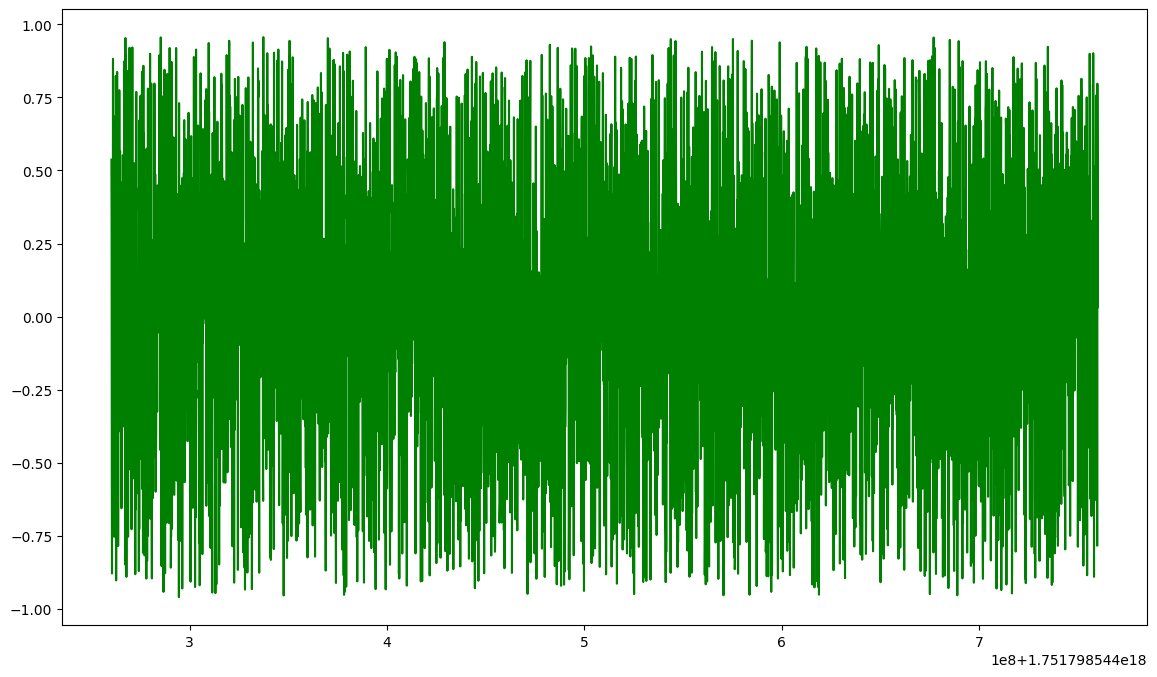

In [7]:
plt.figure(figsize=(14, 8))
plt.plot(df_ob_sorted['timestamp'], df_ob_sorted['obi_level_1'], color='green')
plt.show()

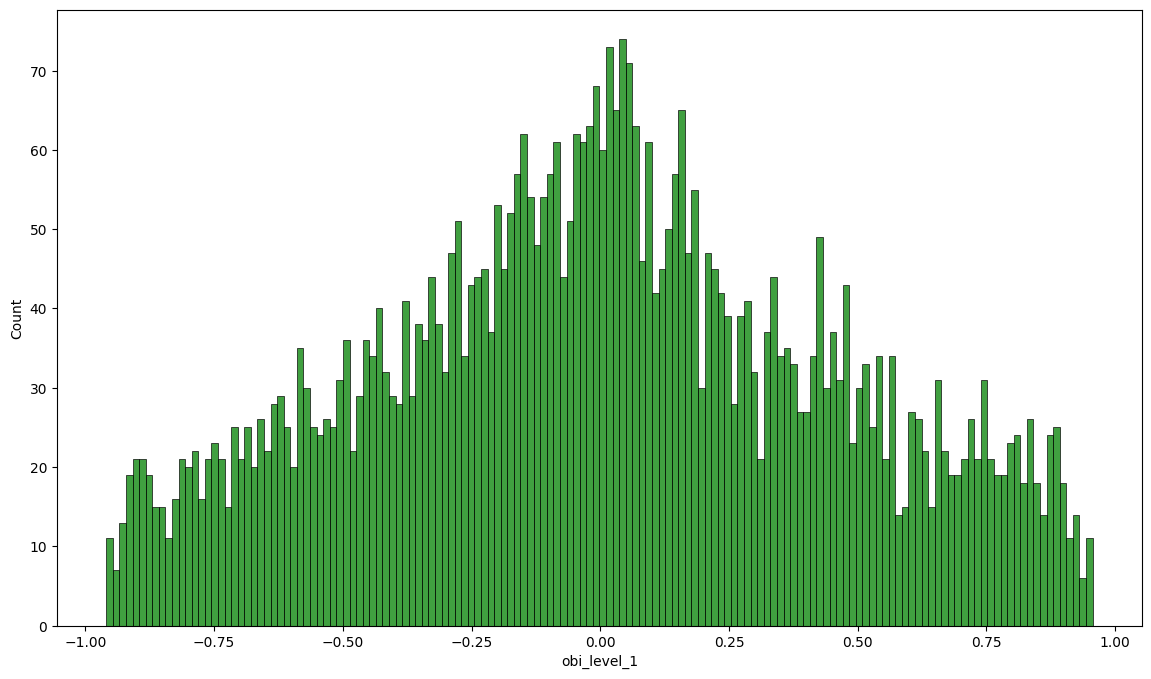

In [10]:
plt.figure(figsize=(14,8))
sns.histplot(df_ob_sorted['obi_level_1'], color='green', bins=150)
plt.show()

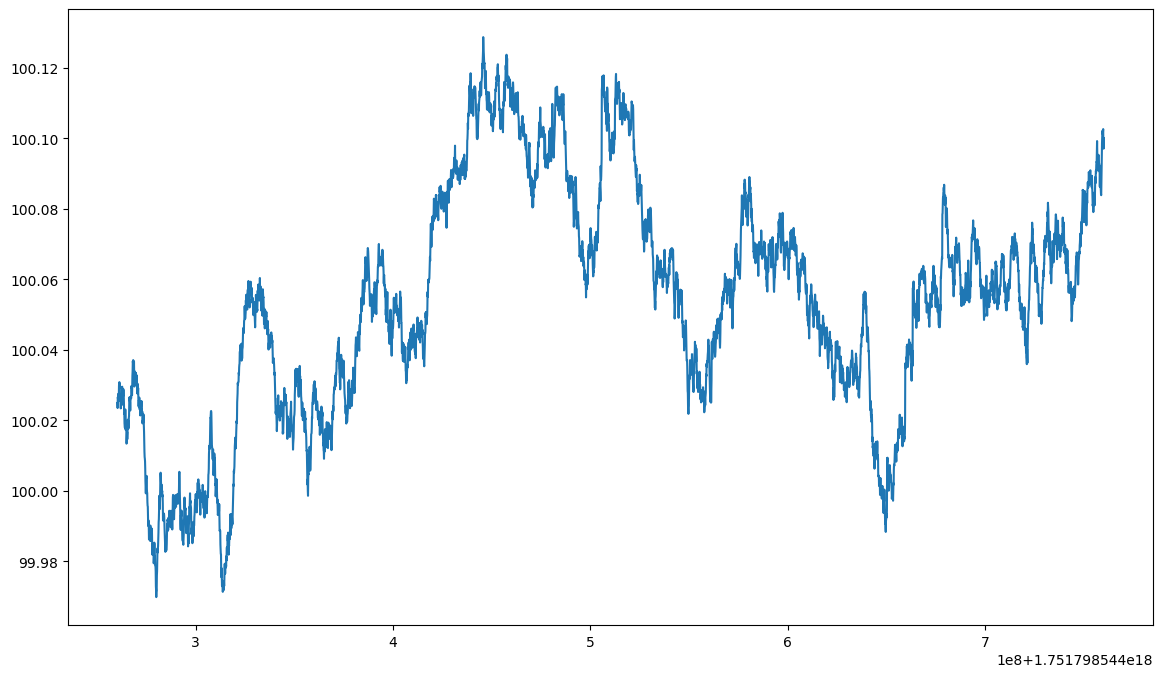

In [11]:
plt.figure(figsize=(14,8))
plt.plot(df_ob_sorted['timestamp'], df_ob_sorted['mid_price'])